<a href="https://www.kaggle.com/code/sebion3c3c/k-means-para-2-datasets-distintos?scriptVersionId=112586865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Clasificación mediante aprendizaje no supervisado (K-means)**

* Nombre: Sebastián Oliva A.
* Carrera: Ingeniería Civil Eléctrica
* Curso: Minería de Datos Aplicada

Este notebook contiene un análisis de dos datasets, uno sobre "intención de los compradores en línea" y el otro sobre "tarjetas de crédito". Para el análisis se utilizará K-means, verificando su efectividad con dos datasets propuestos.

**Importación de librerías**

Se importan las librerías necesarias para realizar el respectivo análisis.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import seaborn as snb
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

**Dataset 1**

Se optó por un dataset de contiene información sobre la intención de compra en línea por consumidores X.

In [2]:
dataset = pd.read_csv("/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv")
dataset.shape

(12330, 18)

Este dataset contiene un total de 12330 filas y 18 columnas, por lo que se ve bastante robusto. 

In [3]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Se puede observar que existen algunas columnas con valores no numéricos, lo cual no es viable para la clasificación. Se cambiará el nombre de los meses por números correspondientes desde el 1 al 12:

In [4]:
dataset['Month'] = dataset['Month'].replace(['Jan','Feb','Mar','Abr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'], ['1','2','3','4','5','6','7','8','9','10','11','12'])
dataset['Month']=dataset['Month'].astype(int)
dataset['VisitorType'] = dataset['VisitorType'].replace(['Other','Returning_Visitor','New_Visitor'],['2','1','0'])
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


También se quitarán las columnas "Weekend" y "Revenue" debido a que no aportan mucha información al caso.

In [5]:
dataset = dataset.drop(['Weekend','Revenue'], axis=1)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1


De esta manera el dataset se ve algo más limpio. Se confirmará si existen o no valores nulos antes de comenzar con el EDA:

In [6]:
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
dtype: int64

Habiendo verificado ésto se puede comenzar con el análisis.

**Análisis de los datos (dataset 1)**

En primera instancia se hará un vistazo a la relación entre los meses y los productos relacionados:

<AxesSubplot:title={'center':'Duración en página'}, ylabel='Month'>

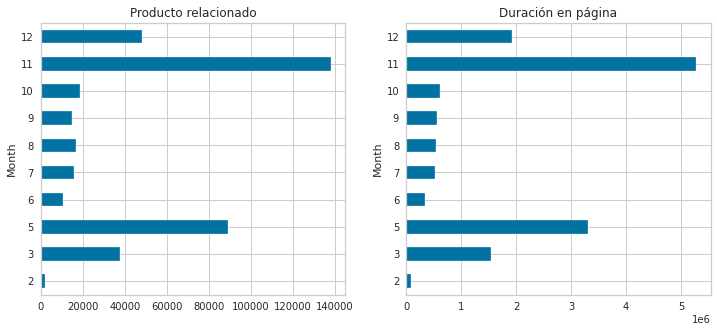

In [7]:
plt.subplots(figsize=(12,5))

plt.subplot(121)
plt.title('Producto relacionado')
dataset.groupby('Month')['ProductRelated'].sum().plot(kind='barh')

plt.subplot(122)
plt.title('Duración en página')
dataset.groupby('Month')['ProductRelated_Duration'].sum().plot(kind='barh')

Se ve una clara supremacía en el mes de Noviembre, mientras que Febrero se queda bastante atrás. Veamos ahora los meses en relación a los administrativos:

<AxesSubplot:title={'center':'Duración en página'}, ylabel='Month'>

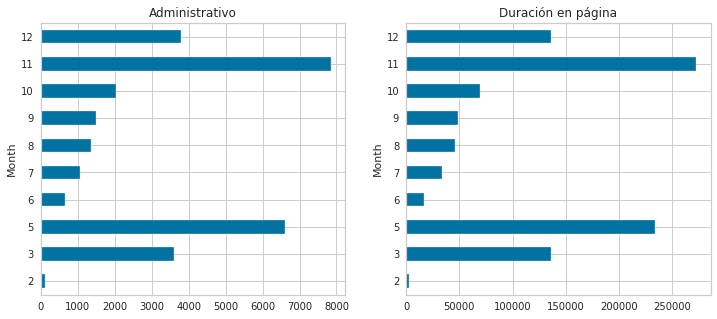

In [8]:
plt.subplots(figsize=(12,5))

plt.subplot(121)
plt.title('Administrativo')
dataset.groupby('Month')['Administrative'].sum().plot(kind='barh')

plt.subplot(122)
plt.title('Duración en página')
dataset.groupby('Month')['Administrative_Duration'].sum().plot(kind='barh')

En cuando a los administrativos, el mes de Octubre saca la ventaja, mientras que Febrero sigue quedándose atrás. Como último vistazo, veamos la relación entre los meses y los informativos:

<AxesSubplot:title={'center':'Duración en página'}, ylabel='Month'>

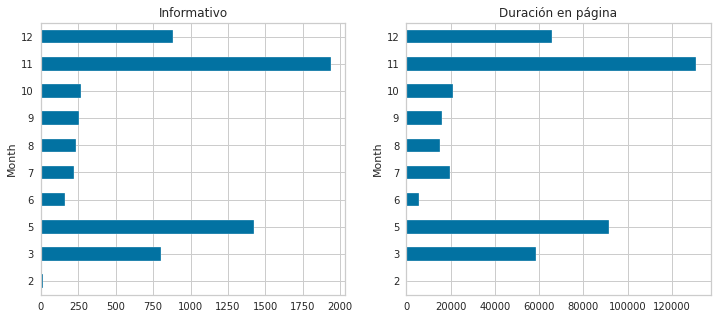

In [9]:
plt.subplots(figsize=(12,5))

plt.subplot(121)
plt.title('Informativo')
dataset.groupby('Month')['Informational'].sum().plot(kind='barh')

plt.subplot(122)
plt.title('Duración en página')
dataset.groupby('Month')['Informational_Duration'].sum().plot(kind='barh')

La mayor tendencia es en el mes de Noviembre, pero en relación a la duración en el sitio se lo lleva Agosto. Febrero sigue quedándose atrás, se puede suponer que la gente no tiene tanto dinero en ese mes.

Ahora se mirará que tipo de visitantes tienen las páginas en qué mes del año generalmente. Para ello se hará un gráfico superpuesto:

<AxesSubplot:>

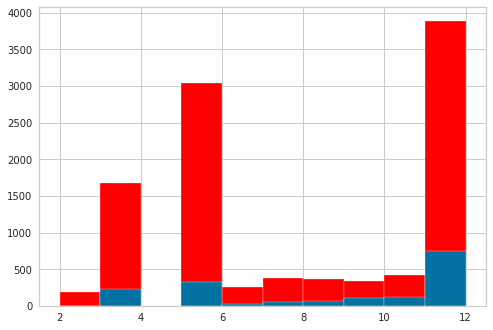

In [10]:
dataset.loc[dataset['VisitorType']=='1']['Month'].hist(bins=10,color='red')
dataset.loc[dataset['VisitorType']=='0']['Month'].hist(bins=10)

En rojo se encuentran los "visitantes que vuelven", mientras que en azul están los "visitantes nuevos". Se ve una clara tendencia con los visitantes que regresan a las páginas, siendo clientes habituales, mostrando un peak de visita en los meses de Mayo y Noviembre.

Luego, se hace una gráfica de dispersión en relación a los meses y el producto relacionado, considerando el tipo de visitante, donde:

* VisitorType(0): Nuevo visitante.
* VisitorType(1): Visitante que regresa.
* VisitorType(2): Otro.

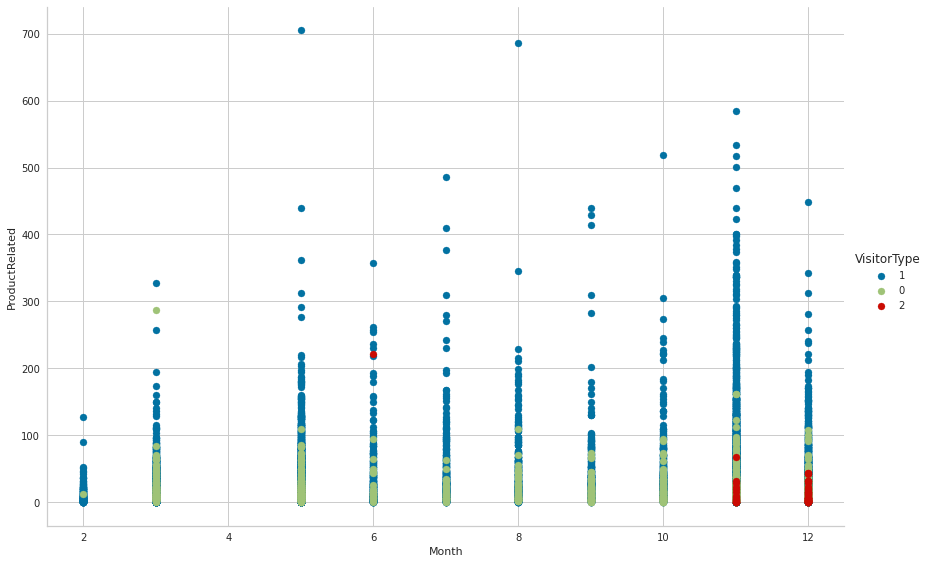

In [11]:
fg = snb.FacetGrid(data=dataset,hue='VisitorType',height=8,aspect=1.5)
fg.map(plt.scatter,'Month','ProductRelated').add_legend()

Ahora meses v/s administrativos:

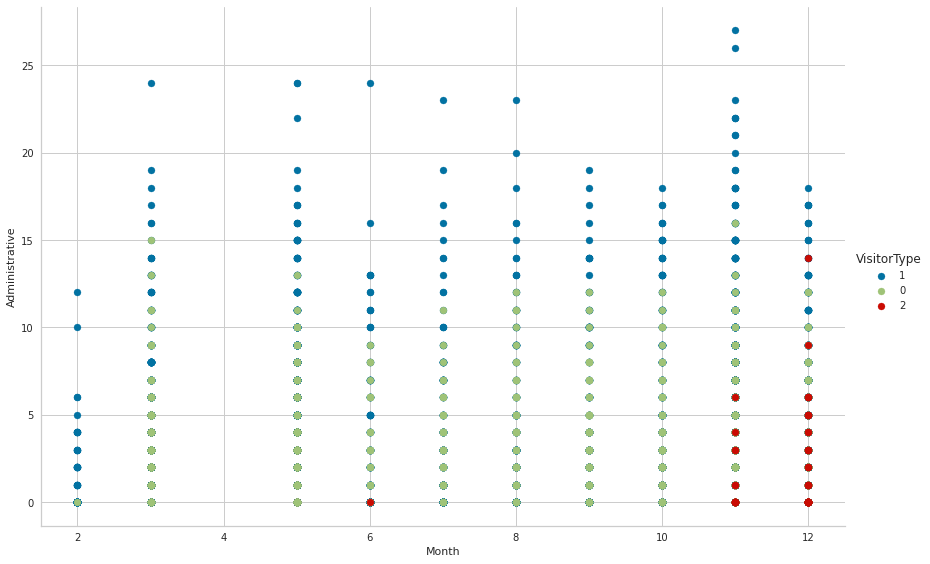

In [12]:
fg = snb.FacetGrid(data=dataset,hue='VisitorType',height=8,aspect=1.5)
fg.map(plt.scatter,'Month','Administrative').add_legend()

Finalmente meses v/s informativos:

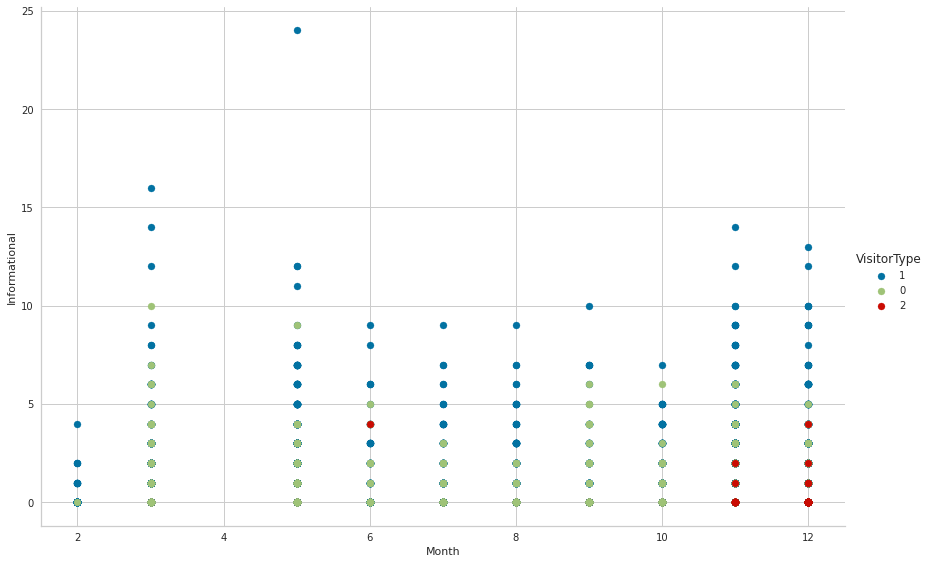

In [13]:
fg = snb.FacetGrid(data=dataset,hue='VisitorType',height=8,aspect=1.5)
fg.map(plt.scatter,'Month','Informational').add_legend()

**K-Means**

Luego del pequeño análisis se comienza con la clasificación mediante K-Means. Primero se verá una información general del dataset utilizado:

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Se creará una fila llamada "Index" en la que se enumerarán los visitantes del 0 a N-1, donde N es la totalidad de filas, es decir, 12330:

In [15]:
dataset['Index']=np.arange(0, 12330, 1)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Index
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,3
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,4


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Se clasificarán 4 clasos para este dataset. Se buscará el número de clusters adecuados para cada uno y se hará la agrupación mediante K-means según corresponda.

**Caso 1: Administrativos**

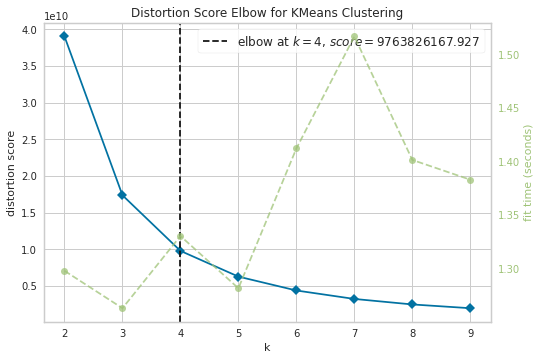

In [17]:
from yellowbrick.cluster import KElbowVisualizer

X = dataset.iloc[:,[16,0]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se escogerá un número de 4 clusters para la clasificación:

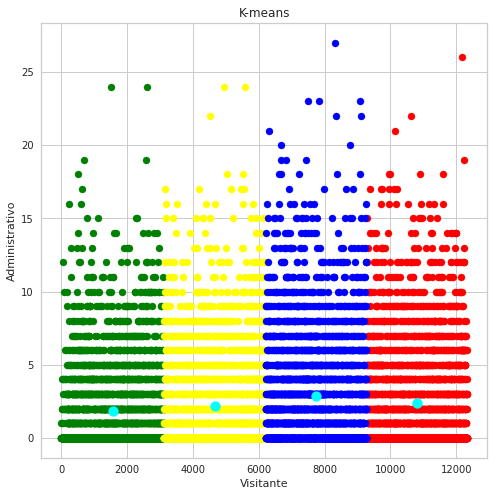

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('Visitante')
plt.ylabel('Administrativo')
plt.show()

**Caso 2: Informativos**

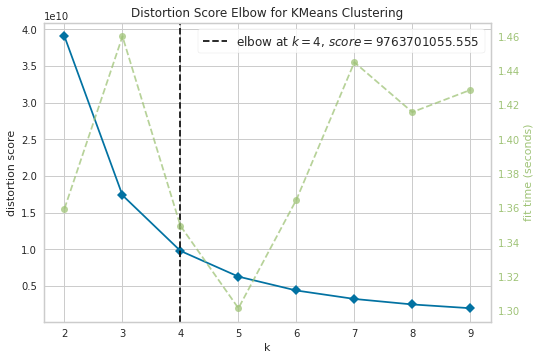

In [19]:
X = dataset.iloc[:,[16,2]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se utilizarán 4 clusters para la clasificación:

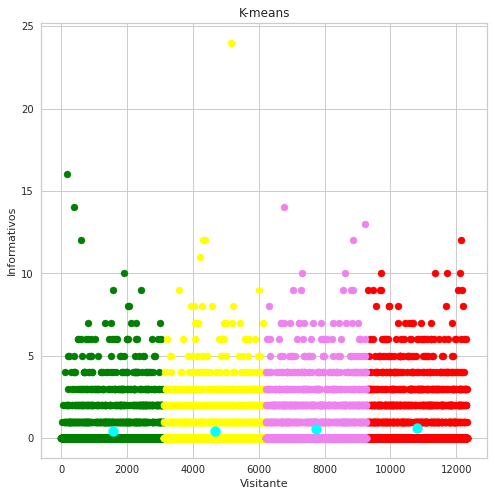

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('Visitante')
plt.ylabel('Informativos')
plt.show()

**Caso 3: Producto relacionado**

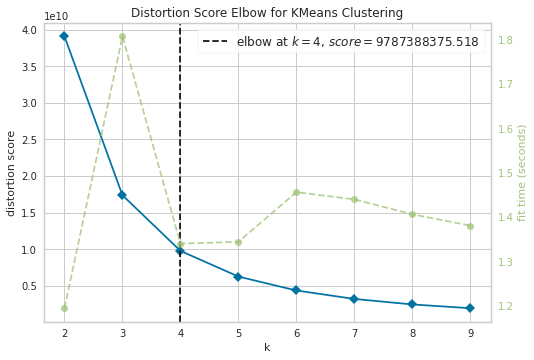

In [21]:
X = dataset.iloc[:,[16,4]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se usarán 4 clusters para la clasificación:

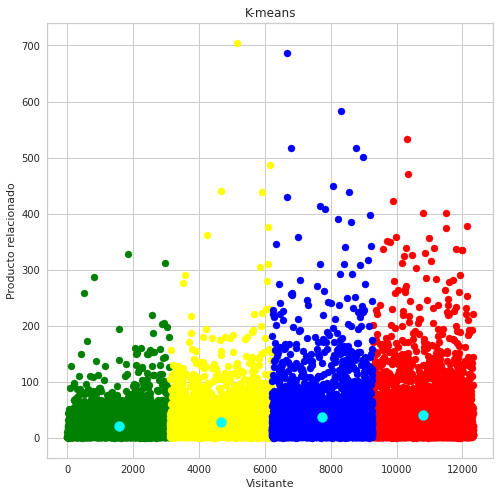

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('Visitante')
plt.ylabel('Producto relacionado')
plt.show()

**Caso 4: Mes**

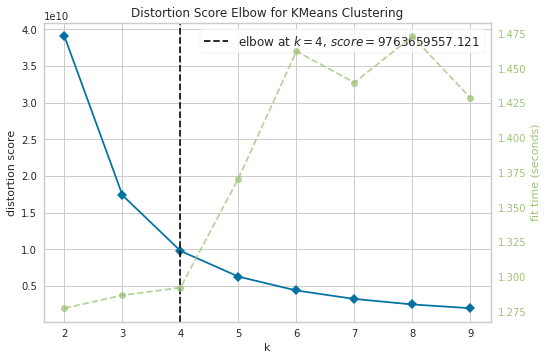

In [23]:
X = dataset.iloc[:,[16,10]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se usarán 4 clusters para la clasificación:

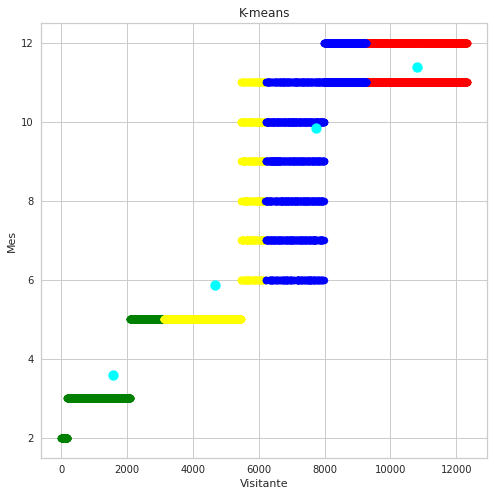

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('Visitante')
plt.ylabel('Mes')
plt.show()

K-means funciona bastante bien para clasificar grupos grandes de datos. Probemos con otro grupo de datos.

**Dataset 2**



Este dataset hace alusión a tarjetas de crédito.

In [25]:
dataset = pd.read_csv("/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv")
dataset.shape

(660, 7)

Se ve que es un dataset que contiene 660 filas y 7 columnas, mucho menos robusto que el anterior. Se hará una vista preliminar del dataset:

In [26]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Aparecen tanto la ID del customer, el límite de dinero que tiene en la tarjeta, el total de tarjetas, visitas al banco tanto presenciales como en línea, total de llamados y la "Customer Key". Se verá si existen datos nulos:

In [27]:
dataset.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Luego de esto se puede comenzar con el análisis.

**Análisis de los datos (dataset 2)**

Se verá la información del dataset como tal:

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Por suerte son todos números enteros, por lo que se puede hacer un análisis más completo. Veremos la relación entre el total de tarjetas de crédito con las visitas presenciales al banco y las online:

<AxesSubplot:title={'center':'Visitas en línea'}, ylabel='Total_Credit_Cards'>

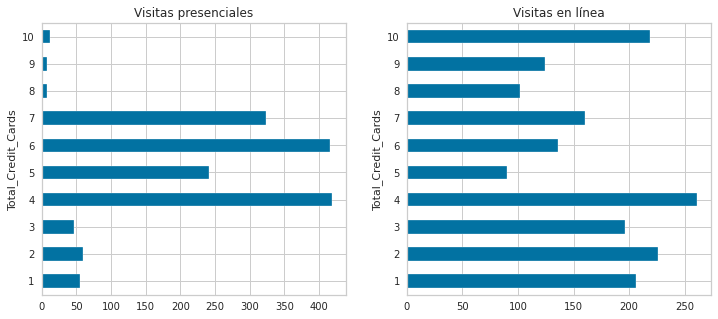

In [29]:
plt.subplots(figsize=(12,5))

plt.subplot(121)
plt.title('Visitas presenciales')
dataset.groupby('Total_Credit_Cards')['Total_visits_bank'].sum().plot(kind='barh')

plt.subplot(122)
plt.title('Visitas en línea')
dataset.groupby('Total_Credit_Cards')['Total_visits_online'].sum().plot(kind='barh')

Claramente hay una mayor tendencia en las visitas en línea, pero los clientes que tienen entre 4 y 7 tarjetas de crédito siguen prefiriendo las visitas presenciales en su mayoría. Hagamos una gráfica que relacione la totalidad de tarjetas versus el promedio de límite de crédito para los customers y las llamadas que realizan:

<AxesSubplot:title={'center':'Total de llamadas'}, ylabel='Total_Credit_Cards'>

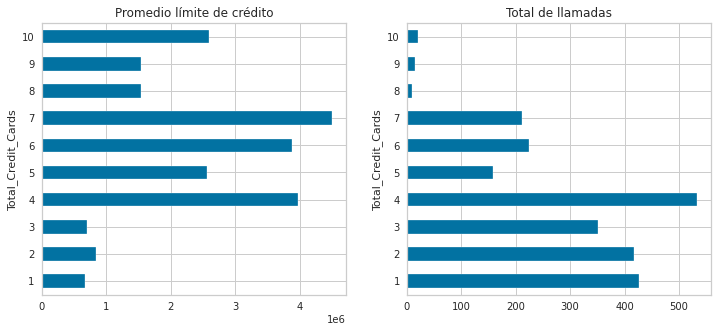

In [30]:
plt.subplots(figsize=(12,5))

plt.subplot(121)
plt.title('Promedio límite de crédito')
dataset.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].sum().plot(kind='barh')

plt.subplot(122)
plt.title('Total de llamadas')
dataset.groupby('Total_Credit_Cards')['Total_calls_made'].sum().plot(kind='barh')

Se ve que en promedio las personas con 4, 6 y 7 tarjetas de crédito poseen mayor límite para gastos si los sumamos todos, ya que los que poseen mayor tope son los de 10 tarjetas, mientras que las personas que tienen 1, 2 y 4 tarjetas son las que realizan más llamados.

Ahora se verá una relación entre el promedio límite de crédito y las visitas presenciales, ubicando en la gráfica los clientes del número de tarjetas de crédito que posean:

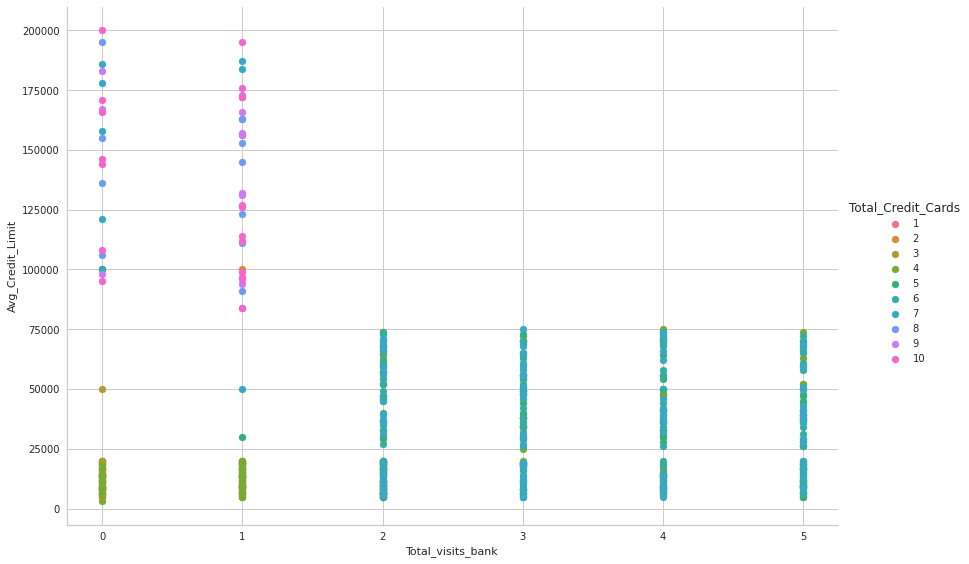

In [31]:
fg = snb.FacetGrid(data=dataset,hue='Total_Credit_Cards',height=8,aspect=1.5)
fg.map(plt.scatter,'Total_visits_bank','Avg_Credit_Limit').add_legend()

Se ve que hay una tendencia para las personas que poseen más tarjetas de crédito, al parecer no van mucho al banco, esto puede ser debido a la confianza que tienen con ellos y poder realizar sus actividades en línea. Veremos que tal nos va con las visitas en línea entonces:

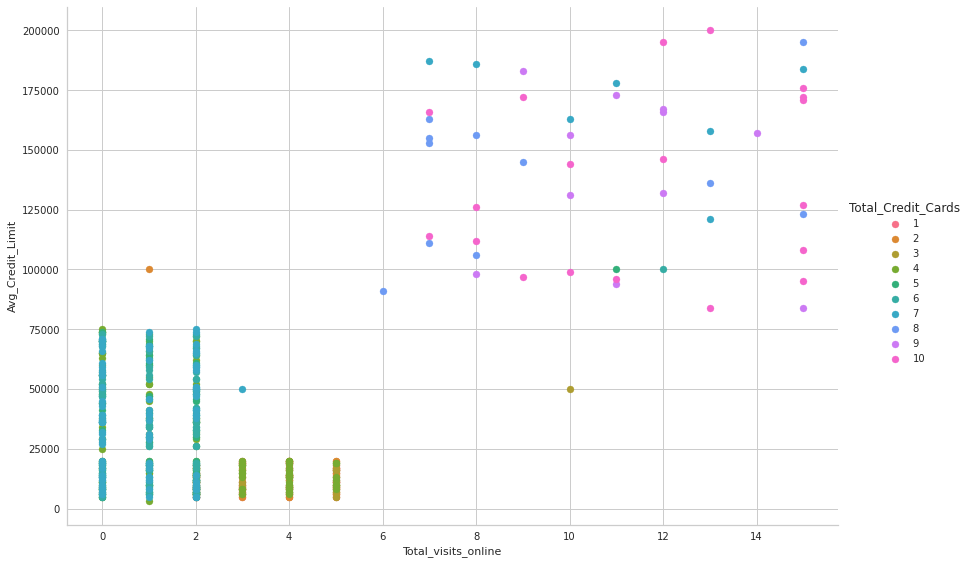

In [32]:
fg = snb.FacetGrid(data=dataset,hue='Total_Credit_Cards',height=8,aspect=1.5)
fg.map(plt.scatter,'Total_visits_online','Avg_Credit_Limit').add_legend()

Se puede ver que las personas con 10 tarjetas por ejemplo frecuencian mucho más las visitas en línea, mientras que las que poseen 7 tarjetas no les gusta mucho este método. Como se vió en el anterior gráfico, las de 7 tarjetas tienden a ir más al banco de manera presencial. Por último, veamos que tal con las llamadas:

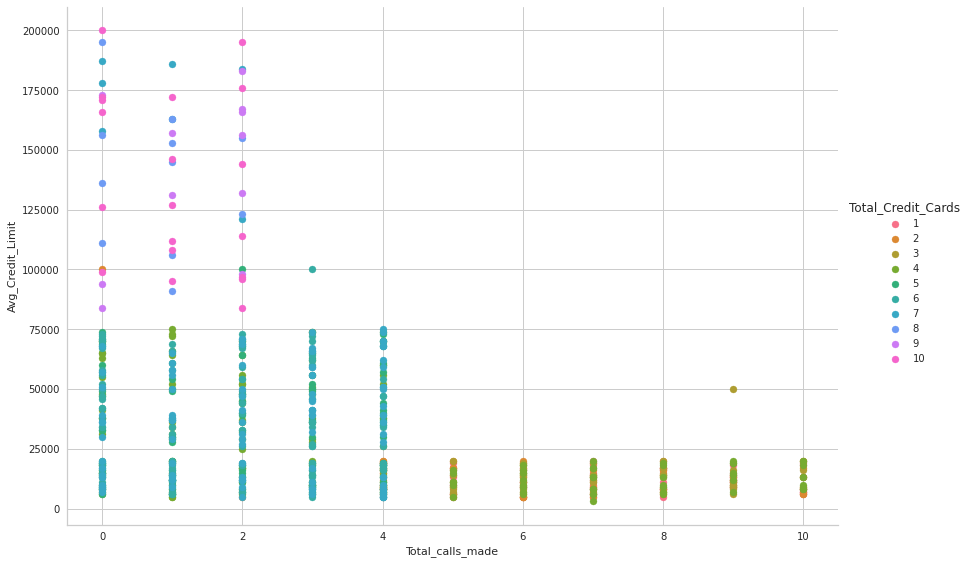

In [33]:
fg = snb.FacetGrid(data=dataset,hue='Total_Credit_Cards',height=8,aspect=1.5)
fg.map(plt.scatter,'Total_calls_made','Avg_Credit_Limit').add_legend()

Se ve que las personas con más tarjetas de crédito no tienden a realizar tantas llamadas, mientras que las que poseen menos son las más preocupadas, debido quizás a la poca experiencia con estas tarjetas.

Ahora pasaremos a la clasificación como tal.

**K-Means**

Se aplizará el modelo de k-means para clasificar mediante clusters en 5 casos

**Caso 1: Límite del crédito**

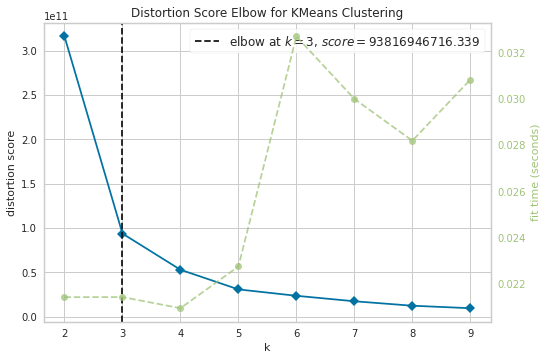

In [34]:
X = dataset.iloc[:,[0,2]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Utilizaremos 3 clusters para la clasificación:

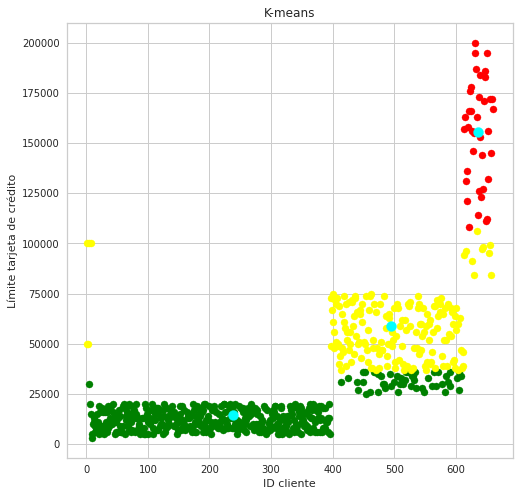

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('ID cliente')
plt.ylabel('Límite tarjeta de crédito')
plt.show()

**Caso 2: Total de tarjetas de crédito**

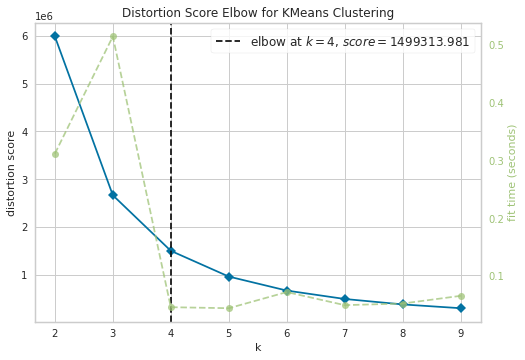

In [36]:
X = dataset.iloc[:,[0,3]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se usarán 4 clusters para la clasificación:

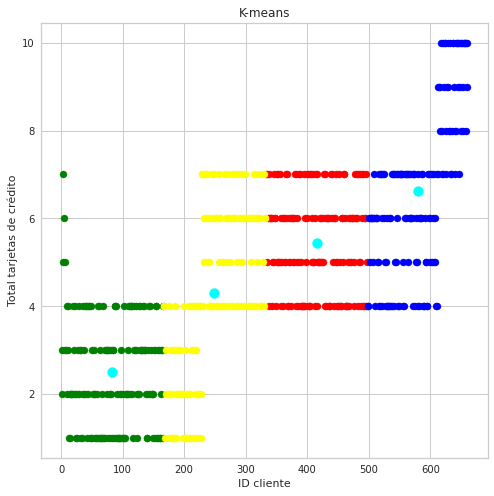

In [37]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('ID cliente')
plt.ylabel('Total tarjetas de crédito')
plt.show()

**Caso 3: Visitas al banco**

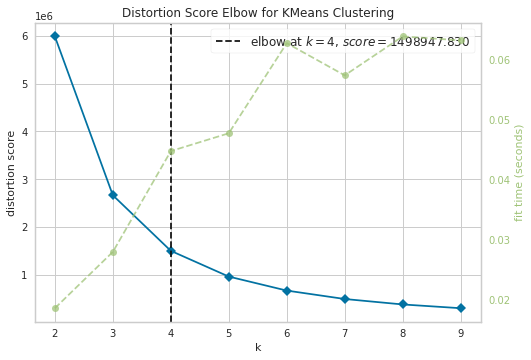

In [38]:
X = dataset.iloc[:,[0,4]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Se utilizarán 4 clusters:

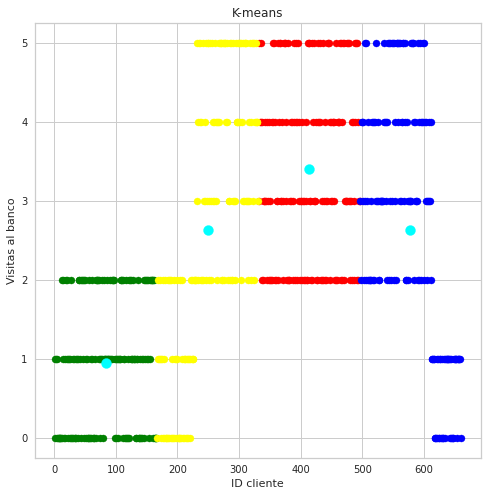

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('ID cliente')
plt.ylabel('Visitas al banco')
plt.show()

**Caso 4: Visitas en línea**

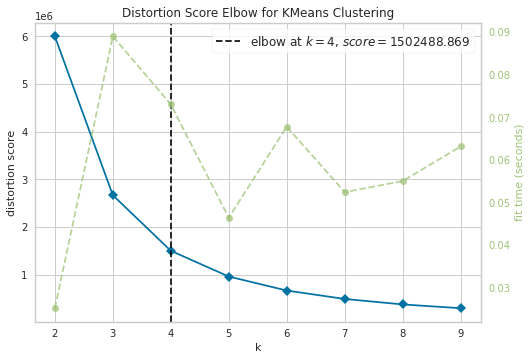

In [40]:
X = dataset.iloc[:,[0,5]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Nuevamente 4 clusters:

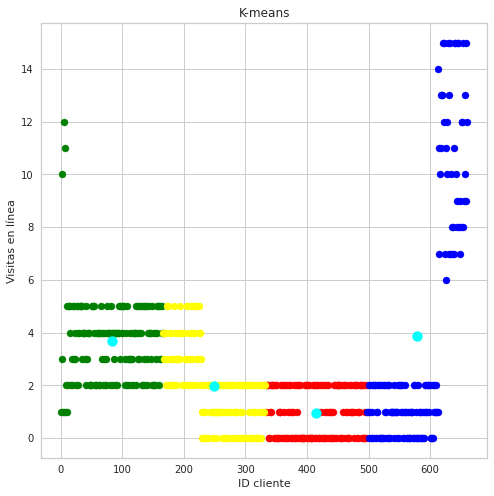

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('ID cliente')
plt.ylabel('Visitas en línea')
plt.show()

**Caso 5: Total de llamadas**

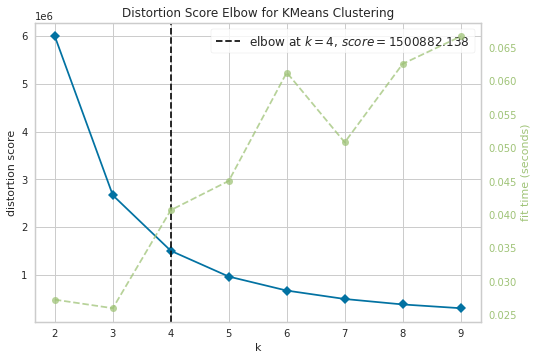

In [42]:
X = dataset.iloc[:,[0,6]].values
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Para concluir, 4 clusters para la clasificación:

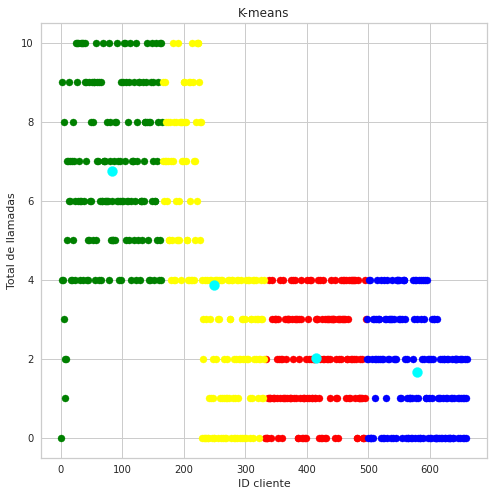

In [43]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('K-means')
plt.xlabel('ID cliente')
plt.ylabel('Total de llamadas')
plt.show()

**Conclusiones finales**

Se puede ver que el método K-Means para la clasificación mediante clustering es bastante viable cuando se tienen grupos de datos muy grandes o incluso más pequeños como el último analizado. Cuando no se tiene claridad al respecto de los datasets con los que se está trabajando, la utilización de métodos no supervisados para la clasificación es una excelente vía para tener un mejor entendimiento de los datos a analizar.